In [1]:
import pandas as pd
df_final=pd.read_csv("Final_Processed_task.csv")

In [2]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838609 entries, 0 to 1838608
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Unnamed: 0    int64 
 1   Unnamed: 0.1  int64 
 2   cord_uid      object
 3   section       object
 4   header        object
dtypes: int64(2), object(3)
memory usage: 70.1+ MB


In [3]:
from gensim.models import word2vec

In [23]:
#Lets not do any prprocessing-
#Lets take only unique header
df=pd.DataFrame(list(set(df_final['header'])))
df.columns=['header']

In [24]:
import gensim
from gensim.models import Doc2Vec

def doc2vec():
    document_tagged = []
    tagged_count = 0
    for _ in df['header'].values:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(_,[tagged_count]))
        tagged_count +=1 
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs

In [25]:
doc2vec = doc2vec()

In [26]:
from sklearn.cluster import KMeans

def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model

In [27]:
X = doc2vec
kmeans4 = KMeans(4)

%time km4 = kmeans4.fit_predict(X)

CPU times: user 2min 16s, sys: 3.53 s, total: 2min 19s
Wall time: 1min 15s


In [28]:
X = doc2vec
kmeans5 = KMeans(5)

%time km5 = kmeans5.fit_predict(X)

CPU times: user 2min 31s, sys: 4.11 s, total: 2min 35s
Wall time: 1min 16s


In [29]:
kmeans6 = KMeans(6)
%time km6 = kmeans6.fit_predict(X)

CPU times: user 1min 21s, sys: 1.77 s, total: 1min 23s
Wall time: 49.1 s


In [30]:
kmeans7 = KMeans(7)
%time km7 = kmeans7.fit_predict(X)

CPU times: user 2min 47s, sys: 3.54 s, total: 2min 50s
Wall time: 1min 38s


In [31]:
kmeans8 = KMeans(8)
%time km8 = kmeans8.fit_predict(X)

CPU times: user 4min 18s, sys: 4.78 s, total: 4min 23s
Wall time: 2min 30s


In [14]:
kmeans8

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

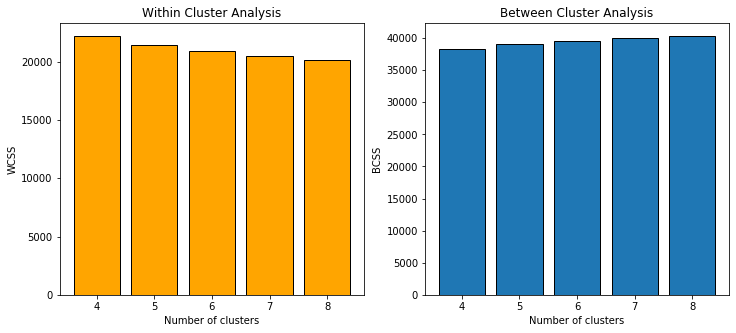

In [32]:
models = [kmeans4,kmeans5, kmeans6, kmeans7,kmeans8]
import matplotlib.pyplot as plt
import numpy as np
def plot_WCSS_BCSS(models, data):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in models]
    n_clusts = [4,5,6,7,8]
    
    ax[0].bar(n_clusts, wcss,color='orange', edgecolor='black', linewidth=1)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    ax[0].set_title('Within Cluster Analysis')
    
    
    ## Plot BCSS 
    n_1 = (float(data.shape[0]) * float(data.shape[1])) - 1.0
    tss = n_1 * np.var(data)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss,edgecolor='black')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    ax[1].set_title('Between Cluster Analysis')
    plt.show()
    

plot_WCSS_BCSS(models,X)

In [33]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,12):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

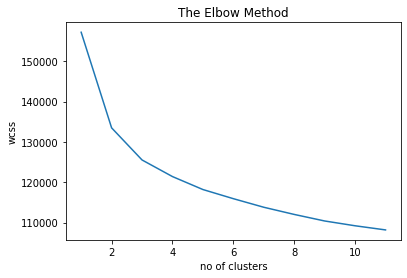

In [20]:
#Visualizing the ELBOW method to get the optimal value of K 
import matplotlib.pyplot as plt
plt.plot(range(1,12), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
#Lets try for 4,5,6 clusters
def prepare_df_Kmeans(corpus_df,i):
    
    km = KMeans(n_clusters=i, random_state=0)
    km.fit_transform(X)
    cluster_labels = km.labels_
    cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
    concat_df=pd.concat([corpus_df, cluster_labels], axis=1)
    return concat_df

In [35]:
for i in range(4,7):
    df_cluster=df.copy()
    concat_df=prepare_df_Kmeans(df_cluster,i)
    concat_df.to_csv("spacy"+str(i)+"_13jun.csv")

In [1]:
#lets also see Silhoutte
from sklearn.metrics import silhouette_score
range_n_clusters = [3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))